In [3]:
import transformers
import torch
import numpy as np
import pandas as pd

## CLEANING DATA AND MERGE INTO ONE FINAL DATAFRAME """

In [4]:
df_MB = pd.read_csv('dataset/MBBANK.csv')
df_MB.drop(columns = 'Name', axis = 1, inplace=True)
df_MB['Name'] = "MB"
df_MB.dropna(inplace=True)

In [5]:
df_VCB1 = pd.read_csv("dataset/VCB1.csv")
df_VCB2 = pd.read_csv("dataset/VCB2.csv")
df_VCB3 = pd.read_csv("dataset/VCB3.csv")

df_VCB1.drop(columns = 'Name', axis = 1, inplace=True)
df_VCB1['Name'] = "VCB"
df_VCB1.dropna(inplace=True)

df_VCB2.drop(columns = 'Name', axis = 1, inplace=True)
df_VCB2['Name'] = "VCB"
df_VCB2.dropna(inplace=True)

df_VCB3.drop(columns = 'Name', axis = 1, inplace=True)
df_VCB3['Name'] = "VCB"
df_VCB3.dropna(inplace=True)

df_VCB = pd.concat([df_VCB1, df_VCB2, df_VCB3], ignore_index=True)


In [6]:
df_tech1 = pd.read_csv("dataset/Tech1.csv")
df_tech2 = pd.read_csv("dataset/Tech2.csv")
df_tech3 = pd.read_csv("dataset/Tech3.csv")
df_tech4 = pd.read_csv("dataset/Tech4.csv")

df_tech1.drop(columns = 'Name', axis = 1, inplace=True)
df_tech1['Name'] = "Tech"
df_tech1.dropna(inplace=True)

df_tech2.drop(columns = 'Name', axis = 1, inplace=True)
df_tech2['Name'] = "Tech"
df_tech2.dropna(inplace=True)

df_tech3.drop(columns = 'Name', axis = 1, inplace=True)
df_tech3['Name'] = "Tech"
df_tech3.dropna(inplace=True)

df_tech4.drop(columns = 'Name', axis = 1, inplace=True)
df_tech4['Name'] = "Tech"
df_tech4.dropna(inplace=True)

df_Tech = pd.concat([df_tech1, df_tech2, df_tech3,df_tech4], ignore_index=True)


In [7]:
df_ACB1 = pd.read_csv("dataset/ACB1.csv")
df_ACB2 = pd.read_csv("dataset/ACB2.csv")
df_ACB3 = pd.read_csv("dataset/ACB3.csv")

df_ACB1.drop(columns = 'Name', axis = 1, inplace=True)
df_ACB1['Name'] = "ACB"
df_ACB1.dropna(inplace=True)

df_ACB2.drop(columns = 'Name', axis = 1, inplace=True)
df_ACB2['Name'] = "ACB"
df_ACB2.dropna(inplace=True)

df_ACB3.drop(columns = 'Name', axis = 1, inplace=True)
df_ACB3['Name'] = "ACB"
df_ACB3.dropna(inplace=True)

df_ACB = pd.concat([df_ACB1, df_ACB2, df_ACB3], ignore_index=True)


In [8]:
df_BIDV1 = pd.read_csv("dataset/BIDV1.csv")
df_BIDV2 = pd.read_csv("dataset/BIDV2.csv")
df_BIDV3 = pd.read_csv("dataset/BIDV3.csv")

df_BIDV1.drop(columns = 'Name', axis = 1, inplace=True)
df_BIDV1['Name'] = "BIDV"
df_BIDV1.dropna(inplace=True)

df_BIDV2.drop(columns = 'Name', axis = 1, inplace=True)
df_BIDV2['Name'] = "BIDV"
df_BIDV2.dropna(inplace=True)

df_BIDV3.drop(columns = 'Name', axis = 1, inplace=True)
df_BIDV3['Name'] = "BIDV"
df_BIDV3.dropna(inplace=True)

df_BIDV = pd.concat([df_BIDV1, df_BIDV2, df_BIDV3], ignore_index=True)


FINAL DATA

In [9]:
df_banks = pd.concat([df_BIDV, df_ACB, df_Tech,df_VCB, df_MB], ignore_index=True)
df_banks.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 685 entries, 0 to 684
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Review  685 non-null    object
 1   Name    685 non-null    object
dtypes: object(2)
memory usage: 10.8+ KB


## Building model using BERT NEURAL NETWORK BERT NERUAL NETWORK and the Hugging Face Transformers library to classify the sentiment of text

In [10]:
from transformers import pipeline
from transformers import AutoTokenizer, AutoModelForSequenceClassification

tokenizer = AutoTokenizer.from_pretrained('5CD-AI/Vietnamese-Sentiment-visobert')
model = AutoModelForSequenceClassification.from_pretrained('5CD-AI/Vietnamese-Sentiment-visobert')
NLP = pipeline('sentiment-analysis', model=model, tokenizer=tokenizer)
try:
    text = df_banks[['Review','Name']].values
except (KeyError, AttributeError) as e:
    print(f"Error accessing content: {e}")
    # Handle the error appropriately (e.g., prompt the user for correct data)
# The code checks the type of each sentence in the list.
if text.all():
    result = []
    for i, sentence in enumerate(text):
        if isinstance(sentence[0], str):
    #If it's a string, it calls the NLP pipeline to classify the sentiment. 
    #It then appends the sentence, sentiment label, score, and bank name to the result list. 
            try:
                sentiment = NLP(sentence[0])[0]
                result.append({'sentence': sentence[0], 'sentiment': sentiment['label'], 
                            'score': sentiment['score'],'name': sentence[1] })
                print(f"Processed {i+1} out of {len(text)} sentences.")
            except Exception as e:
                print(f"Error processing sentence: {sentence}, Error: {e}")
    # If sentence is a list, the code iterates through each sub-sentence in the list and performs sentiment analysis on each one. 
    # The resulting sentiment, score, and bank name are added to the result list.
        elif isinstance(sentence[0], list):
            for sub_sentence in sentence[0]:
                try:
                    sentiment = NLP(sub_sentence)[0]
                    result.append({'sentence': sub_sentence, 'sentiment': sentiment['label'], 
                                'score': sentiment['score'],'name': sentence[1] })
                    print(f"Processed {i+1} out of {len(text)} sentences.")
                except Exception as e:
                    print(f"Error processing sentence: {sub_sentence}, Error: {e}")
        else:
            print(f"Unsupported content type: {type(sentence[0])}")

    result_df = pd.DataFrame(result)
    print(result_df.head())
    
else:
    print("ERROR")

Processed 1 out of 685 sentences.
Processed 2 out of 685 sentences.
Processed 3 out of 685 sentences.
Processed 4 out of 685 sentences.
Processed 5 out of 685 sentences.
Processed 6 out of 685 sentences.
Processed 7 out of 685 sentences.
Processed 8 out of 685 sentences.
Processed 9 out of 685 sentences.
Processed 10 out of 685 sentences.
Processed 11 out of 685 sentences.
Processed 12 out of 685 sentences.
Processed 13 out of 685 sentences.
Processed 14 out of 685 sentences.
Processed 15 out of 685 sentences.
Processed 16 out of 685 sentences.
Processed 17 out of 685 sentences.
Processed 18 out of 685 sentences.
Processed 19 out of 685 sentences.
Processed 20 out of 685 sentences.
Processed 21 out of 685 sentences.
Processed 22 out of 685 sentences.
Processed 23 out of 685 sentences.
Processed 24 out of 685 sentences.
Processed 25 out of 685 sentences.
Processed 26 out of 685 sentences.
Processed 27 out of 685 sentences.
Processed 28 out of 685 sentences.
Processed 29 out of 685 sente

## NOTE: The reason we check for both string and list data types in the sentence variable is to handle different ways the text data could be structured in the DataFrame

Data Variability: This dataset is from Google Reviews , and may have varying data structures. Sometimes the content column might contain a single string per review, and other times it could contain a list of strings representing multiple sentences from a single review(icons, code, slangs...). By checking for both string and list data types, the code can handle these variations and still perform sentiment analysis on the text data.

Model Compatibility: The Hugging Face Transformers pipeline (NLP) expects text input in the format of a single string or a list of strings. This is why we need to ensure that the input to the pipeline (sentence[0] in our case) is either a string or a list of strings.

## Store NLP in joblib for the interactive app

In [11]:
import joblib as jb
jb.dump(NLP, "NLP.pkl")

['NLP.pkl']

In [12]:
# remove all the review that has less than 0.91 score
result_df = result_df[result_df['score'] >= 0.91]
result_df.to_csv('result_df.csv', index=False)

## EXPLORATION


In [13]:
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS


In [20]:
result_df['sentiment'] = result_df['sentiment'].replace({"NEG":"Tiêu Cực", "POS": "Tích Cực", "NEU":"Bình Thường"})
result_df = pd.DataFrame(result_df).reset_index(drop=True)
result_df

,sentence,sentiment,score,name
0,"Bác bảo vệ nhiệt tình, mình đi qua bảo vệ toà ...",Tích Cực,0.997035,BIDV
1,"Dịch vụ nhiệt tình, các nhân viên nữ xinh xắn,...",Tích Cực,0.998318,BIDV
2,"ngân hàng rất chuyên nghiệp, nhân viên thân th...",Tích Cực,0.997904,BIDV
3,"Không gian thoáng đẹp, các bạn nhân viên thì t...",Tích Cực,0.999095,BIDV
4,Vào giao dịch chuyển tiền đi nước ngoài thấy n...,Tích Cực,0.999554,BIDV
...,...,...,...,...
632,"Gdv quầy số 2 rất thân thiện, nhiệt tình. Dịch...",Tích Cực,0.998381,MB
633,Tốt,Tích Cực,0.993776,MB
634,Tốt,Tích Cực,0.993776,MB
635,👍 …,Tích Cực,0.989747,MB


In [21]:
# Count the number of positive and negative reviews for each bank
bank_review = result_df.groupby('name')['sentiment'].count().sort_values(ascending=False).reset_index()
bank_review

,name,sentiment
0,MB,173
1,VCB,152
2,BIDV,129
3,Tech,107
4,ACB,76


## Sửa lại tên dòng sentiment 

Text(0.5, 0, 'NUMBER OF REVIEWS')

<Figure size 1300x500 with 0 Axes>

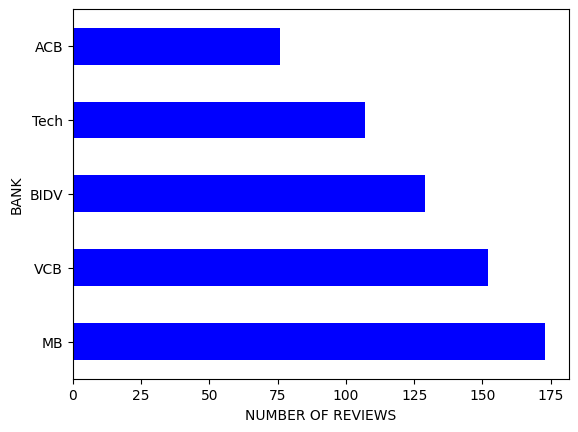

In [22]:
# Plot the number of positive and negative reviews for each bank
plt.figure(figsize=(13, 5))
bank_review[['name','sentiment']].plot(kind = 'barh', x = 'name', y = 'sentiment', color = 'blue', legend = False)
plt.ylabel('BANK')
plt.xlabel('NUMBER OF REVIEWS')

## Sự khác biệt về số lượng đánh giá:

Có sự chênh lệch đáng kể về số lượng đánh giá giữa các tổ chức.
MB dẫn đầu với khoảng 175 đánh giá, trong khi ACB có ít nhất với khoảng 80 đánh giá.


## Thứ hạng:

Thứ tự từ nhiều đánh giá nhất đến ít nhất là: MB > VCB > BIDV > Tech > ACB.
Ba ngân hàng hàng đầu (MB, VCB, BIDV) có số lượng đánh giá cao hơn hẳn so với hai tổ chức còn lại.


## Phân nhóm:

Có thể chia thành 3 nhóm: nhóm dẫn đầu (MB, VCB), nhóm giữa (BIDV), và nhóm cuối (Tech, ACB).


*Mức độ tương tác với khách hàng:

Số lượng đánh giá có thể phản ánh mức độ tương tác của khách hàng với các tổ chức này.
MB và VCB có vẻ nhận được nhiều phản hồi nhất từ khách hàng.


T*iềm năng cải thiện:

ACB và Tech có cơ hội lớn để cải thiện số lượng đánh giá, có thể bằng cách khuyến khích khách hàng đưa ra phản hồi nhiều hơn.



## Kết luận:

Biểu đồ cho thấy sự khác biệt rõ rệt về số lượng đánh giá giữa các tổ chức tài chính/ngân hàng.
MB và VCB nổi bật với số lượng đánh giá cao, cho thấy có thể họ có chiến lược hiệu quả trong việc thu hút phản hồi từ khách hàng.

Các tổ chức có ít đánh giá hơn như ACB và Tech có thể cần xem xét lại chiến lược tương tác khách hàng của mình.
Số lượng đánh giá có thể phản ánh phần nào về quy mô khách hàng, mức độ phổ biến hoặc hiệu quả trong việc khuyến khích khách hàng đưa ra phản hồi của mỗi tổ chức.

In [23]:
# find out which bankbank has the most positive reviews and which bank has the most negative reviews
positive_reviews = result_df[result_df['sentiment'] == 'Tích Cực'].groupby('name')['sentiment'].count().sort_values(ascending=False).reset_index()
negative_reviews = result_df[result_df['sentiment'] == 'Tiêu Cực'].groupby('name')['sentiment'].count().sort_values(ascending=False).reset_index()
neutral_reviews = result_df[result_df['sentiment'] == 'Bình Thường'].groupby('name')['sentiment'].count().sort_values(ascending=False).reset_index()

# rename to diffrentiate between positive and negative reviews
negative_reviews.rename(columns={'sentiment': 'negative_reviews'}, inplace=True)
positive_reviews.rename(columns={'sentiment': 'positive_reviews'}, inplace=True)
neutral_reviews.rename(columns={'sentiment': 'neutral_reviews'}, inplace=True)

# merge into 1 dataframe
df_compare_reviews  = positive_reviews.merge(negative_reviews ,on='name', how='outer').fillna(0)
df_compare_reviews = df_compare_reviews.merge(neutral_reviews, on='name', how='outer').fillna(0)
# sort the dataframe by positive reviews in descending order
df_compare_reviews.sort_values(ascending=False, by = 'positive_reviews', inplace = True)
df_compare_reviews


,name,positive_reviews,negative_reviews,neutral_reviews
2,MB,154,18,1
1,BIDV,84,43,2
4,VCB,72,70,10
3,Tech,53,45,9
0,ACB,43,28,5


Text(0.5, 0, 'REVIEWS')

<Figure size 1000x800 with 0 Axes>

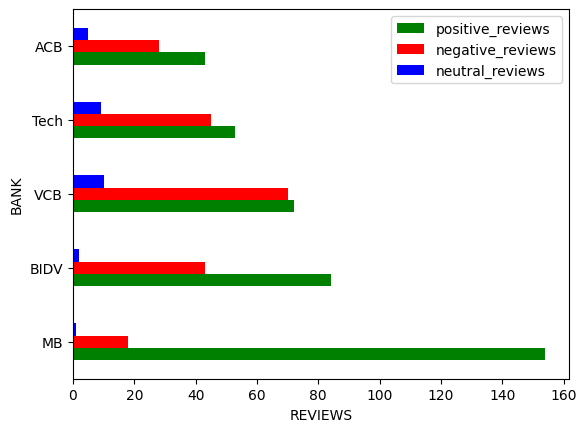

In [24]:
# visualize
plt.figure(figsize=(10, 8))
df_compare_reviews[['name','positive_reviews','negative_reviews','neutral_reviews']].plot(kind = 'barh',
                                                                            x = 'name', y = ['positive_reviews','negative_reviews','neutral_reviews'],
                                                                            color = ['green','red','blue'], legend = True, linewidth = 10).figure
plt.ylabel('BANK')
plt.xlabel('REVIEWS')

## Số lượng đánh giá:

MB có tổng số đánh giá cao nhất, chủ yếu là đánh giá tích cực.
BIDV và VCB có số lượng đánh giá tương đối cao.
Tech và ACB có ít đánh giá hơn so với các ngân hàng khác.


## Đánh giá tích cực:

MB nổi bật với số lượng đánh giá tích cực áp đảo.
BIDV cũng có tỷ lệ đánh giá tích cực cao.
VCB, Tech và ACB có tỷ lệ đánh giá tích cực và tiêu cực tương đối cân bằng.


## Đánh giá tiêu cực:

VCB có số lượng đánh giá tiêu cực cao nhất.
ACB, mặc dù có ít đánh giá nhất, nhưng tỷ lệ đánh giá tiêu cực khá cao so với tổng số đánh giá.


## Đánh giá trung lập:

Tất cả các ngân hàng đều có một số lượng nhỏ đánh giá trung lập.
VCB có số lượng đánh giá trung lập cao nhất.



## Kết luận:

MB đang thể hiện hiệu suất tốt nhất về mặt hài lòng khách hàng, với số lượng đánh giá tích cực áp đảo.
BIDV cũng đang có kết quả khả quan với tỷ lệ đánh giá tích cực cao.
VCB, mặc dù có nhiều đánh giá, nhưng cần cải thiện chất lượng dịch vụ để giảm số lượng đánh giá tiêu cực.
Tech và ACB có cơ hội để tăng số lượng đánh giá và cải thiện tỷ lệ hài lòng của khách hàng.
Tất cả các ngân hàng đều cần chú ý đến việc giảm thiểu đánh giá tiêu cực và tăng cường trải nghiệm khách hàng để nâng cao tỷ lệ đánh giá tích cực.

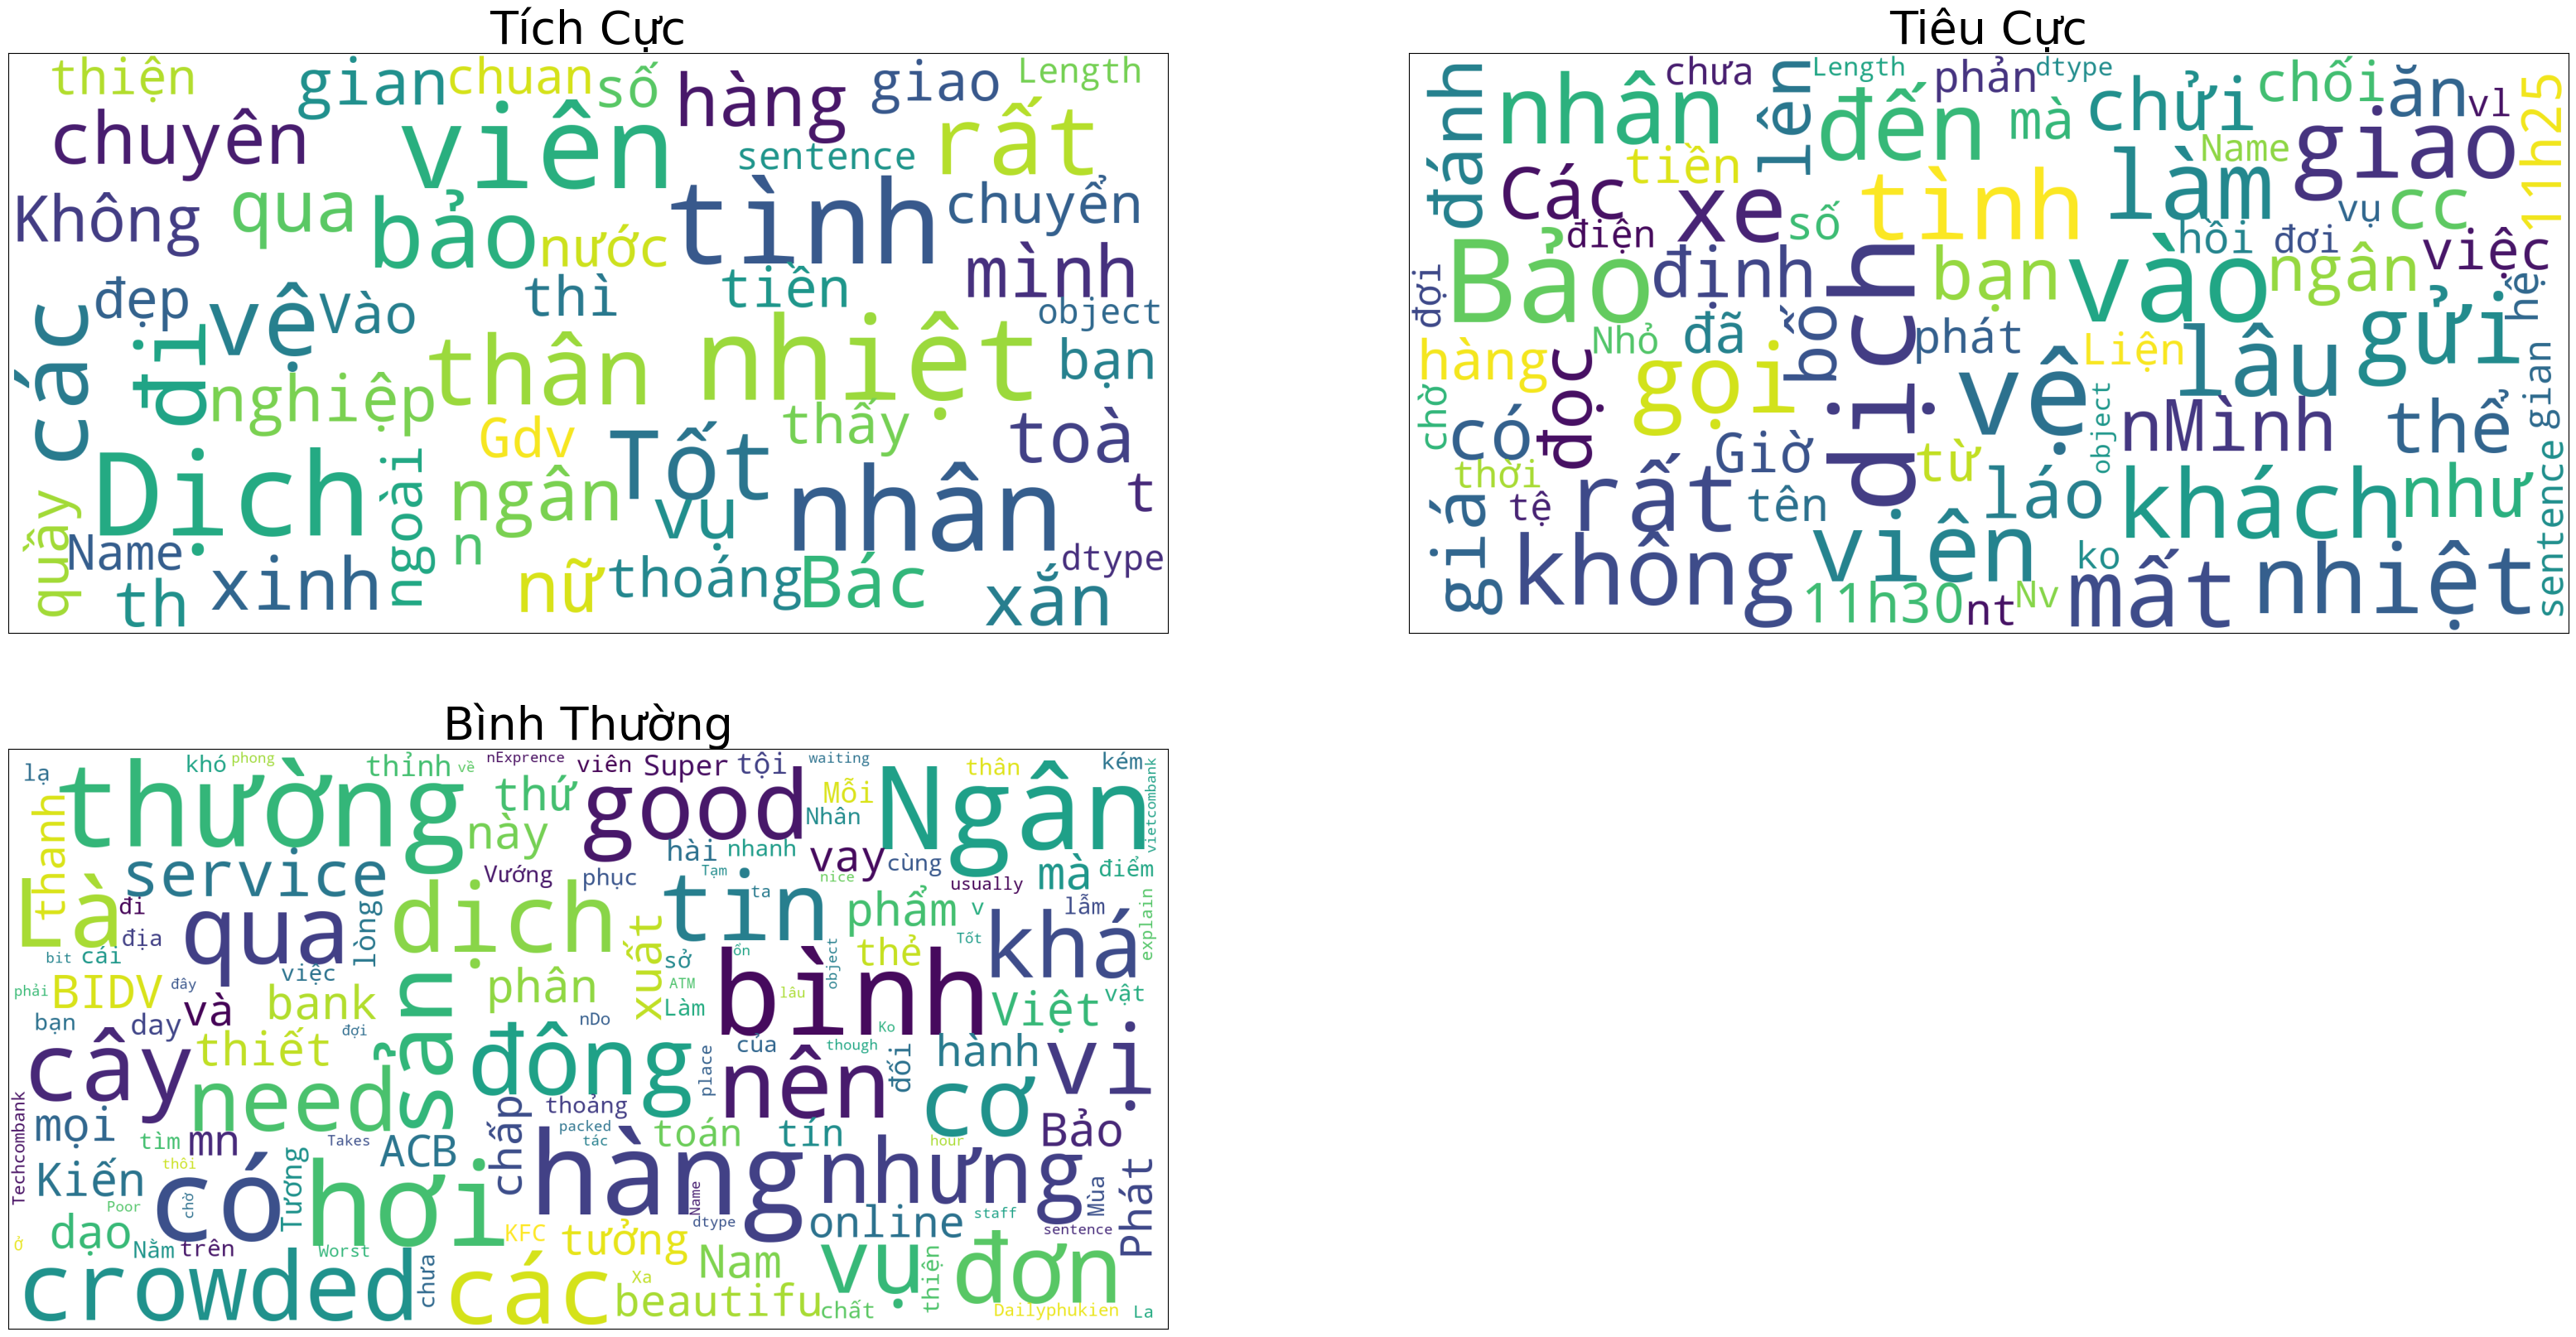

<Figure size 640x480 with 0 Axes>

In [25]:
# plot 2x2 grid word cloud for each sentiment
plt.figure(figsize=(40,20))
stopwords = set(STOPWORDS)
for index, col in enumerate(result_df['sentiment'].unique()):
    plt.subplot(2,2, index+1)
    
    df1 = result_df[result_df['sentiment']==col]
    data = df1['sentence']
    wordcloud = WordCloud(background_color='white', stopwords=stopwords, max_words=500, max_font_size=40, scale=5).generate(str(data))
    
    plt.xticks([])
    plt.yticks([])
    plt.imshow(wordcloud)
    plt.title(col, fontsize=40)
    
plt.show()
plt.tight_layout()

## từ khóa (word clouds) 
-- "Tích Cực" (Positive): Những từ nổi bật bao gồm "nhiệt tình", "tốt", "chuyên nghiệp", "nhanh", "đẹp",'xinh xắn', .

-- "Tiêu Cực" (Negative): Các từ khóa chính là "không", "chờ đợi", "lâu", "khách hàng", "giao dịch","Bảo vệ","láo", "chửi","mất".

-- "Bình Thường" (Neutral): Từ ngữ phổ biến gồm "ngân hàng", "giao dịch", "nhân viên", "làm việc", "bình thường".

## Từ những biểu đồ này, ta có thể rút ra một số nhận xét:

-- Khách hàng hài lòng thường đề cập đến sự nhiệt tình và chuyên nghiệp của nhân viên, cũng như tốc độ giao dịch nhanh chóng.

-- Những phản hồi tiêu cực thường liên quan đến thời gian chờ đợi lâu và các vấn đề trong quá trình giao dịch.

-- Đánh giá trung lập tập trung vào các khía cạnh cơ bản của dịch vụ ngân hàng mà không thể hiện cảm xúc rõ rệt.

Từ "nhân viên" xuất hiện trong cả ba biểu đồ, cho thấy vai trò quan trọng của nhân viên trong trải nghiệm khách hàng.
Từ "giao dịch" cũng xuất hiện trong cả ba biểu đồ, cho thấy quá trình giao dịch là một yếu tố quan trọng trong đánh giá của khách hàng.

Tốc độ giao dịch là một yếu tố quan trọng, được đề cập trong cả phản hồi tích cực và tiêu cực.